## *You need to finish code where "..." exists and add some Markdown cells to give answers based on the outputs when necessary*

# Question 1

In [10]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def func(X):
    x, y = X
    return x ** 4 - x ** 2 + y ** 2 + 2 * x * y - 2

def first_derivative(X):
    x, y = X
    dfdx = 4 * x ** 3 - 2 * x + 2 * y
    dfdy = 2 * y + 2 * x
    return np.array([dfdx, dfdy])

def second_derivative(X):
    x,y = X
    d2fdx2 = 12 * x ** 2 - 2
    d2fdxy = 2
    d2fdy2 = 2
    return np.array([[d2fdx2, d2fdxy],[d2fdxy, d2fdy2]])

In [13]:
X = (1,-1)
x, y = X
print(x)
print(first_derivative(X))
second_derivative(X)
[(1, -1), (-1,1), (0,0), (0,-2)]
len([(1, -1), (-1,1), (0,0), (0,-2)])

1
[0 0]


4

## (a)

In [21]:
a = np.array([[1,0],[0,1]])
print(np.linalg.eig(a))

(array([1., 1.]), array([[1., 0.],
       [0., 1.]]))


In [22]:
points = [(1, -1), (-1,1), (0,0), (0,-2)]

for X in points:
    print("Point:", X)
    print("Gradient:", first_derivative(X))
    evalue, evector = np.linalg.eig(second_derivative(X))
    print("Hessian eigenvalues:", evalue) # use np.linalg.eig function to get eigenvalues and eigenvectors
    print("----")
    

Point: (1, -1)
Gradient: [0 0]
Hessian eigenvalues: [10.47213595  1.52786405]
----
16.000000000000007
Point: (-1, 1)
Gradient: [0 0]
Hessian eigenvalues: [10.47213595  1.52786405]
----
16.000000000000007
Point: (0, 0)
Gradient: [0 0]
Hessian eigenvalues: [-2.82842712  2.82842712]
----
-7.999999999999998
Point: (0, -2)
Gradient: [-4 -4]
Hessian eigenvalues: [-2.82842712  2.82842712]
----
-7.999999999999998


## (b)

In [38]:
original_point = np.array([1.5, 1.5])
step_size = 0.1
new_point = original_point - step_size * first_derivative(original_point) # should be [0.15, 0.9]

print(new_point)

if func(original_point) < func(new_point):
    print("This is a good step")
else:
    print("This is a bad step")


[0.15 0.9 ]
This is a bad step


## (c)

In [49]:
def steepest_descent(func, first_derivative, starting_point, step_size, tol):
    """
    Steepest Descent
    
    Parameters
    ----------
    func: Callable
        Function to be minimized
    first_derivative: Callable
        First derivative of the function to be minimized
    starting_point: np.ndarray
        Starting point of minimization
    step_size: float
        Size of each gradient descent step
    tol: float
        If the norm of the gradient is smaller than tol, the minimization will terminate
    
    Returns
    -------
    res: dict
        Optimization result
    """
    deriv = first_derivative(starting_point)
    count = 0
    visited = []
    while np.linalg.norm(deriv) > tol and count < 1e6:
        new_point = starting_point - step_size * deriv
        if func(new_point) < func(starting_point):
            starting_point = new_point
            visited.append(starting_point)
            deriv = first_derivative(starting_point)
            step_size *= 1.2
        else:
            step_size /= 2
        count += 1
    return {
        "x": starting_point,
        "evaluation": func(starting_point),
        "count": count,
        "path": np.array(visited)
       
    }

In [117]:
starting_point = np.array([1.5,1.5])
step_size = 0.1
tol = 10**-5
res = steepest_descent(func, first_derivative, starting_point, step_size, tol)
res

{'x': array([-0.99999852,  0.99999607]),
 'evaluation': -2.999999999985186,
 'count': 51,
 'path': array([[ 0.15      ,  0.9       ],
        [-0.03162   ,  0.648     ],
        [-0.22733235,  0.47048256],
        [-0.4603766 ,  0.38644985],
        [-0.73063964,  0.41710875],
        [-0.91361447,  0.57314178],
        [-0.89067253,  0.77647099],
        [-0.98168777,  0.81739147],
        [-0.94167921,  0.88803587],
        [-1.0240441 ,  0.91571465],
        [-0.95964931,  0.94925202],
        [-1.01216804,  0.95311466],
        [-0.98795692,  0.96627781],
        [-0.99481157,  0.9720766 ],
        [-0.99412388,  0.97937406],
        [-0.99741632,  0.98505533],
        [-0.99646125,  0.99076871],
        [-1.00111334,  0.9939261 ],
        [-0.99723697,  0.99631795],
        [-1.00126535,  0.99668496],
        [-0.99895278,  0.99778247],
        [-0.99981882,  0.99811897],
        [-0.99948229,  0.99870549],
        [-1.00001741,  0.99902712],
        [-0.99975409,  0.99927314],
  

Funtion for drawing path:

In [167]:
def draw_path(func, path, x_min=-2, x_max=2, y_min=-2, y_max=2):
    a = np.linspace(x_min, x_max, 100)
    b = np.linspace(y_min, y_max, 100)
    x, y = np.meshgrid(a, b)
    z = func((x, y))
    fig, ax = plt.subplots()
    contour = ax.contour(x, y, z, 50)
    plt.colorbar(contour)
    ax.plot(path[:, 0], path[:, 1], color='red')
    plt.show()
    print("Length of the path:", np.sum(np.sqrt(np.sum(np.diff(path, axis=0)**2, axis=1))))

In [58]:
def path_function(func, first_derivative, starting_point, step_size, tol):
    
    deriv = first_derivative(starting_point)
    count = 0
    visited = []
    while np.linalg.norm(deriv) > tol and count < 1e6:
        new_point = starting_point - step_size * deriv
        if func(new_point) < func(starting_point):
            starting_point = new_point
            visited.append(starting_point)
            deriv = first_derivative(starting_point)
            step_size *= 1.2
        else:
            step_size /= 2
        count += 1
    return np.array(visited)
    

In [169]:
path = path_function(func, first_derivative, starting_point, step_size, tol)
path

array([[ 0.15      ,  0.9       ],
       [-0.03162   ,  0.648     ],
       [-0.22733235,  0.47048256],
       [-0.4603766 ,  0.38644985],
       [-0.73063964,  0.41710875],
       [-0.91361447,  0.57314178],
       [-0.89067253,  0.77647099],
       [-0.98168777,  0.81739147],
       [-0.94167921,  0.88803587],
       [-1.0240441 ,  0.91571465],
       [-0.95964931,  0.94925202],
       [-1.01216804,  0.95311466],
       [-0.98795692,  0.96627781],
       [-0.99481157,  0.9720766 ],
       [-0.99412388,  0.97937406],
       [-0.99741632,  0.98505533],
       [-0.99646125,  0.99076871],
       [-1.00111334,  0.9939261 ],
       [-0.99723697,  0.99631795],
       [-1.00126535,  0.99668496],
       [-0.99895278,  0.99778247],
       [-0.99981882,  0.99811897],
       [-0.99948229,  0.99870549],
       [-1.00001741,  0.99902712],
       [-0.99975409,  0.99927314],
       [-0.99990384,  0.99941651],
       [-0.99986709,  0.99959085],
       [-0.99997668,  0.99970943],
       [-0.99988705,

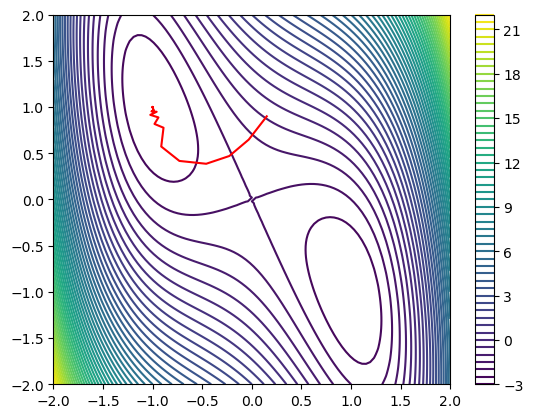

Length of the path: 2.009495827843268


In [170]:
# draw path
draw_path(func, path, x_min=-2, x_max=2, y_min=-2, y_max=2)

## (d)

In [70]:
from scipy.optimize import minimize

def minimize_func(x0, method):
    """
    Minimize Rosenbrock function
    
    Parameters
    ---------
    x0: np.ndarray
        Starting point
    method: str
        Method for minimization
    
    Returns
    ------
    res: OptimzizeResult
        Result object of scipy optimization
    """
    res = minimize(
        func,
        x0,
        method = method,
        options = {
            "gtol": 1e-5,
            "disp": True
        })
    return res

# minimize with CG
# please refer to Tutorial 1 or Scipy Documentation for usage of `minimize` function
res = minimize_func(starting_point, 'CG')
print(res.x)
print(res.nit)

Optimization terminated successfully.
         Current function value: -3.000000
         Iterations: 9
         Function evaluations: 78
         Gradient evaluations: 26
[-0.99999984  0.99999929]
9


In [71]:
# minimize with BFGS
res = minimize_func(starting_point, 'BFGS')
print(res.x)
print(res.nit)

Optimization terminated successfully.
         Current function value: -3.000000
         Iterations: 7
         Function evaluations: 24
         Gradient evaluations: 8
[ 0.99999979 -0.9999998 ]
7


CG and BFGS have go through less iterations than GD.

## Question 2

In [158]:
def Rosenbrock(X):
    x, y = X
    return (1 - x)**2 + 10*(y - x**2)**2

def Rosenbrock_grad(X):
    x, y = X
    dfdx = -2*x + 10 * 2 * -2 * x
    dfdy = 10 * 2 * y
    
    return np.array([dfdx, dfdy])

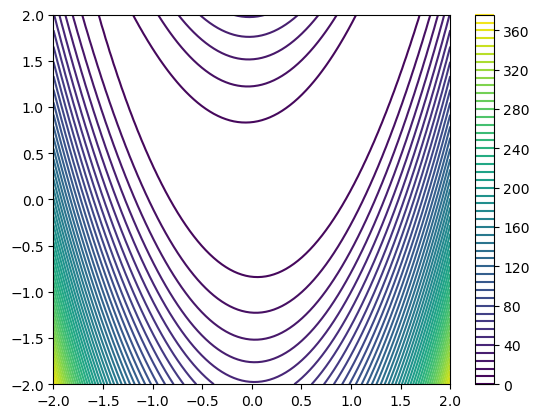

In [175]:
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)

# Evaluate the Rosenbrock function at each point in the grid
Z = Rosenbrock((X, Y))

# Create a contour plot
#plt.contour(X, Y, Z, levels=np.logspace(-1, 3, 10), cmap='spring')
fig, ax = plt.subplots()
contour = ax.contour(X, Y, Z, 50)
plt.colorbar(contour)

## (a)

In [172]:
original_point = np.array([-0.5, 1.5])
# minimization
tol = 1e-5
res = steepest_descent(Rosenbrock, Rosenbrock_grad, original_point,0.1, tol)
print(res)
# draw path
path = path_function(Rosenbrock, Rosenbrock_grad, original_point, step_size, tol)

{'x': array([-1.025,  0.75 ]), 'evaluation': 5.0043789062499995, 'count': 1000000, 'path': array([[-1.025,  0.75 ]])}


[[-1.025  0.75 ]]


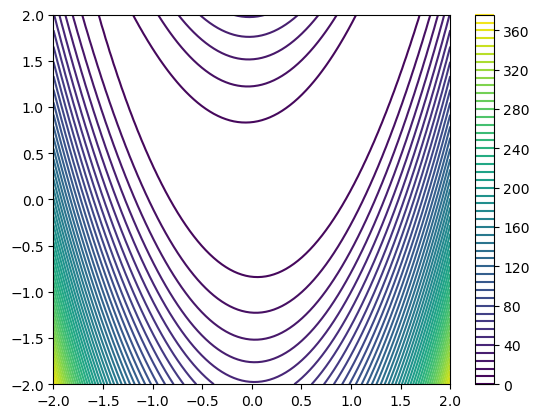

Length of the path: 0.0


In [173]:
# draw path
print(path)
draw_path(Rosenbrock, path, x_min=-2, x_max=2, y_min=-2, y_max=2)

In [ ]:
def steepest_descent(func, first_derivative, starting_point, step_size, tol):
    """
    Steepest Descent
    
    Parameters
    ----------
    func: Callable
        Function to be minimized
    first_derivative: Callable
        First derivative of the function to be minimized
    starting_point: np.ndarray
        Starting point of minimization
    step_size: float
        Size of each gradient descent step
    tol: float
        If the norm of the gradient is smaller than tol, the minimization will terminate
    
    Returns
    -------
    res: dict
        Optimization result
    """
    deriv = first_derivative(starting_point)
    count = 0
    visited = []
    while np.linalg.norm(deriv) > tol and count < 1e6:
        new_point = starting_point - step_size * deriv
        if func(new_point) < func(starting_point):
            starting_point = new_point
            visited.append(starting_point)
            deriv = first_derivative(starting_point)
            step_size *= 1.2
        else:
            step_size /= 2
        count += 1
    return {
        "x": starting_point,
        "evaluation": func(starting_point),
        "count": count,
        "path": np.array(visited)
       
    }

/var/folders/d9/6wjn536x21n4fgb_hwj80bx80000gp/T/ipykernel_23076/3333444374.py:35: RuntimeWarning: overflow encountered in double_scalars
  dfdx = -2 * x + 20 * -2 * x


Length of the path: 1001
[[ -0.5    1.  ]
 [ -2.6   -1.  ]
 [-13.52   1.  ]
 ...
 [  -inf   1.  ]
 [  -inf  -1.  ]
 [  -inf   1.  ]]


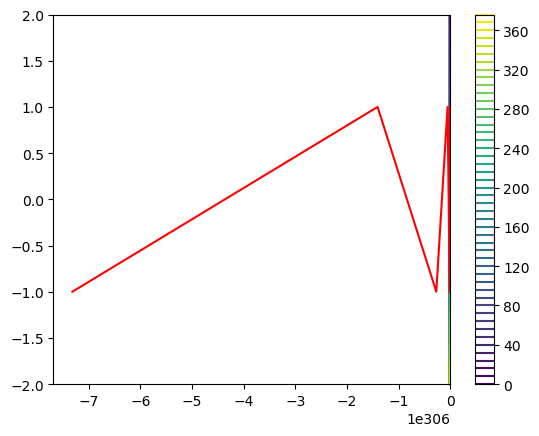

In [149]:
def gradient_descent(func, grad_func, initial_point, learning_rate, tolerance, max_iter=1000):
    current_point = initial_point
    path = [current_point]

    for i in range(max_iter):
        gradient = grad_func(current_point)
        new_point = current_point - learning_rate * gradient

        if np.linalg.norm(gradient) < tolerance:
            break

        current_point = new_point
        path.append(current_point)

    return np.array(path)

def draw_path(func, path, x_min=-2, x_max=2, y_min=-2, y_max=2):
    a = np.linspace(x_min, x_max, 100)
    b = np.linspace(y_min, y_max, 100)
    x, y = np.meshgrid(a, b)
    z = func((x, y))
    fig, ax = plt.subplots()
    contour = ax.contour(x, y, z, 50)
    plt.colorbar(contour)
    ax.plot(path[:, 0], path[:, 1], color='red')
    print("Length of the path:", len(path))

# Define the Rosenbrock function and its gradient
def Rosenbrock(X):
    x, y = X
    return (1 - x)**2 + 10*(y - x**2)**2

def Rosenbrock_grad(X):
    x, y = X
    dfdx = -2 * x + 20 * -2 * x
    dfdy = 20 * y
    return np.array([dfdx, dfdy])

# Set initial parameters
initial_point = np.array([-0.5, 1.0])
learning_rate = 0.1
tolerance = 1e-5

# Run gradient descent
path = gradient_descent(Rosenbrock, Rosenbrock_grad, initial_point, learning_rate, tolerance)

# Plot the optimization path
draw_path(Rosenbrock, path)


## (b)

In [130]:
def sgd(func, first_derivative, starting_point, step_size, tol, stochastic_injection=0):
    """
    Stochastic Gradient Descent
    
    Parameters
    ----------
    func: Callable
        Function to be minimized
    first_derivative: Callable
        First derivative of the function to be minimized
    starting_point: np.ndarray
        Starting point of minimization
    step_size: float
        Size of each gradient descent step
    tol: float
        If the norm of the gradient is smaller than tol, the minimization will terminate
    stochastic_injection: int
        Enable stochastic gradient (set to 1) or not (set to 0).
    
    Returns
    -------
    res: dict
        Optimization result
    """
    deriv = first_derivative(starting_point)
    count = 0
    visited = []
    while np.linalg.norm(deriv) > tol and count < 1e6:
        if stochastic_injection > 0:
            random_vector = np.random.random(len(starting_point)) * 2 - 1
            stochastic_deriv = np.linalg.norm(deriv) * random_vector / np.linalg.norm(random_vector)
        else:
            stochastic_deriv = np.zeros(len(starting_point))
        direction = -(deriv + stochastic_injection * stochastic_deriv)
        new_point = starting_point + step_size * direction

        if func(new_point) < func(starting_point):
            visited.append(starting_point)
            starting_point = new_point
            deriv = first_derivative(starting_point)
            step_size *= 1.2
        else:
            step_size /= 2
        count += 1
    return {
        "x": starting_point,
        "evaluation": func(starting_point),
        "path": np.array(visited)
    }

In [ ]:
original_point = np.array([-0.5, 1.5])
res = ... # don't forget to turn on stochastic_injection

In [ ]:
# draw path
...

## (c)

In [125]:
# use scipy.optimize.minimize
from scipy.optimize import minimize

def minimize_func(x0, method):
    """
    Minimize Rosenbrock function
    
    Parameters
    ---------
    x0: np.ndarray
        Starting point
    method: str
        Method for minimization
    
    Returns
    ------
    res: OptimzizeResult
        Result object of scipy optimization
    """
    res = minimize(
        Rosenbrock,
        x0,
        method = method,
        options = {
            "gtol": 1e-5,
            "disp": True
        })
    return res

print("Minimizing with CG")
res = minimize_func(original_point, 'CG')
print(res.x)

Minimizing with CG
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 20
         Function evaluations: 132
         Gradient evaluations: 44
[0.99999955 0.99999908]


In [127]:
print("Minimizing with BFGS")

res = minimize_func(original_point, 'BFGS')
print(res.x)

Minimizing with BFGS
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 22
         Function evaluations: 93
         Gradient evaluations: 31
[0.99999959 0.99999917]


## (d)

## (e)

In [ ]:
def statistics_test(method, args, times, global_minimum=None):
    result = []
    for n in range(times):
        res = method(*args)
        if global_minimum is not None and np.linalg.norm(res['x'] - global_minimum) > 1e-3:
            continue
        result.append(len(res['path']))
    
    msg = f"Running {times} times: reach global minimum {len(result)} times"
    if len(result) > 0:
        avg = ... # calulate average
        std = ... # calculate standard deviation
        msg += f", average {int(avg)} steps with variance {std:.2f}"
    print(msg)

    
starting_points = [
    original_point,
    np.array([0.0, 1.0]),
    np.array([-1.0, 1.0]),
    np.array([1.5, 0.5])
]

In [ ]:
# test stochastic gradient descent
for pt in starting_points:
    statistics_test(
        ...,
        (...), # pass in arguments of the function
        20 # run the SGD for 20 times
    )

In [ ]:
# test steepest descent
for pt in starting_points:
    ...

In [ ]:
# run CG for different statring points
for pt in starting_points:
    ...

In [ ]:
# run BFGS for different statring points
for pt in starting_points:
    ...

# Question 3

In [128]:
def Camel(X):
    x,y = X
    return 2 * x ** 2 - 1.05 * x ** 4 + x ** 6 / 6 + x * y + y ** 2

def Camel_grad(X):
    x, y = X
    dfdx = 4 * x - 4.2 * x ** 3 + x ** 5 + y 
    dfdy = x + 2 * y
    return np.array([dfdx, dfdy])

## (a)

In [142]:
original_point = np.array([-1.5, -1.5])

starting_points = [
    original_point,
    np.array([0.0, 1.0]),
    np.array([-1.0, 1.0]),
    np.array([1.5, 0.5])
]

# test SGD
for pt in starting_points:
    res = sgd(Camel, Camel_grad, pt, step_size, tol, stochastic_injection=0)
    print(res)

{'x': array([-1.74755157,  0.87377203]), 'evaluation': 0.29863844225443226, 'path': array([[-1.5       , -1.5       ],
       [-1.408125  , -1.05      ],
       [-1.34908437, -0.629025  ],
       [-1.3229272 , -0.25359765],
       [-1.34485037,  0.06264752],
       [-1.44850078,  0.31553451],
       [-1.6747923 ,  0.51893769],
       [-1.78627579,  0.70912006],
       [-1.6637625 ,  0.77505698],
       [-1.74057378,  0.78727368],
       [-1.74015981,  0.80869017],
       [-1.74372834,  0.82769563],
       [-1.74371645,  0.84410443],
       [-1.74739132,  0.85647721],
       [-1.74328738,  0.86568849],
       [-1.75021679,  0.86759999],
       [-1.74648247,  0.86904602],
       [-1.7474342 ,  0.87001555],
       [-1.74711178,  0.87104209],
       [-1.74754675,  0.87187866],
       [-1.74718144,  0.87263532],
       [-1.74758428,  0.87286424],
       [-1.74739737,  0.87313104],
       [-1.74761087,  0.8733269 ],
       [-1.7473706 ,  0.87352504],
       [-1.74761364,  0.87356485],
      

In [139]:
# run CG for different statring points
# don't forget to check if the global minium is reached

def minimize_func(x0, method):
    """
    Minimize Rosenbrock function
    
    Parameters
    ---------
    x0: np.ndarray
        Starting point
    method: str
        Method for minimization
    
    Returns
    ------
    res: OptimzizeResult
        Result object of scipy optimization
    """
    res = minimize(
        Camel,
        x0,
        method = method,
        options = {
            "gtol": 1e-5,
            "disp": True
        })
    return res

for pt in starting_points:
    print(minimize_func(pt, 'CG'))
    print('---------------------------------')

Optimization terminated successfully.
         Current function value: 0.298638
         Iterations: 7
         Function evaluations: 63
         Gradient evaluations: 21
 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 0.2986384422397371
       x: [-1.748e+00  8.738e-01]
     nit: 7
     jac: [ 8.404e-06  7.451e-07]
    nfev: 63
    njev: 21
---------------------------------
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 36
         Gradient evaluations: 12
 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 2.2992118373213772e-15
       x: [ 2.646e-08 -4.600e-08]
     nit: 6
     jac: [ 8.964e-08 -5.064e-08]
    nfev: 36
    njev: 12
---------------------------------
Optimization terminated successfully.
         Current function value: 0.298638
         Iterations: 6
         Function evaluations: 63
         Gradient evaluations

In [140]:
# run BFGS for different statring points
# don't forget to check if the global minium is reached
for pt in starting_points:
    print(minimize_func(pt, 'BFGS'))
    print('---------------------------------')

Optimization terminated successfully.
         Current function value: 0.298638
         Iterations: 8
         Function evaluations: 30
         Gradient evaluations: 10
  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.29863844223685976
        x: [-1.748e+00  8.738e-01]
      nit: 8
      jac: [ 1.937e-07 -7.451e-09]
 hess_inv: [[ 8.569e-02 -4.290e-02]
            [-4.290e-02  5.109e-01]]
     nfev: 30
     njev: 10
---------------------------------
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 7
         Function evaluations: 24
         Gradient evaluations: 8
  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 1.6463262045328837e-14
        x: [ 8.809e-08 -9.774e-08]
      nit: 7
      jac: [ 2.844e-07 -9.248e-08]
 hess_inv: [[ 2.906e-01 -1.477e-01]
            [-1.477e-01  5.762e-01]]
     nfev: 24
     njev: 8
---------------------------------
Opt

## (b)

In [143]:
def sgdm(func, first_derivative, starting_point, step_size, tol, stochastic_injection=1, momentum = 1):
    """
    Stochastic Gradient Descent with Momentum
    
    Parameters
    ----------
    func: Callable
        Function to be minimized
    first_derivative: Callable
        First derivative of the function to be minimized
    starting_point: np.ndarray
        Starting point of minimization
    step_size: float
        Size of each gradient descent step
    tol: float
        If the norm of the gradient is smaller than tol, the minimization will terminate
    stochastic_injection: int
        Enable stochastic gradient (set to 1) or not (set to 0).
    momentum: float
        Momentum (\eta) value in SGDM algorithm
    
    Returns
    -------
    res: dict
        Optimization result
    """
    
    deriv = first_derivative(starting_point)
    count = 0
    visited = []
    previous_direction = np.zeros(len(starting_point))
    while np.linalg.norm(deriv) > tol and count < 1e6:
        if stochastic_injection > 0:
            random_vector = np.random.random(len(starting_point)) * 2 - 1
            stochastic_deriv = np.linalg.norm(deriv) * random_vector / np.linalg.norm(random_vector)
        else:
            stochastic_deriv = np.zeros(len(starting_point))
        direction = -(deriv + stochastic_injection * stochastic_deriv)
        new_point = starting_point + step_size * (momentum * previous_direction + direction)

        if func(new_point) < func(starting_point):
            visited.append(starting_point)
            starting_point = new_point
            previous_direction = direction
            deriv = first_derivative(starting_point)
            step_size *= 1.2
        else:
            if step_size < 1e-5:
                previous_direction = np.zeros(len(starting_point))
            else:
                step_size /= 2
        count += 1
    
    return {
        "x": starting_point,
        "evaluation": func(starting_point),
        "path": np.array(visited)
    }

In [176]:
# test SGDM
for pt in starting_points:
    res = sgdm(func, first_derivative, starting_point, step_size, tol, stochastic_injection=1, momentum = 1)
    print(res)
    print('______________________________')

{'x': array([-0.99999831,  0.99999595]), 'evaluation': -2.9999999999830322, 'path': array([[ 1.5       ,  1.5       ],
       [ 1.25123711,  1.88477247],
       [-1.08733987,  0.6656979 ],
       [-1.08732758,  0.66572135],
       [-1.08730457,  0.6657756 ],
       [-1.08725654,  0.66580212],
       [-1.08720593,  0.66582872],
       [-1.0872033 ,  0.66587717],
       [-1.08719253,  0.66594139],
       [-1.0871537 ,  0.66606983],
       [-1.08702897,  0.66620723],
       [-1.08682041,  0.66637353],
       [-1.08671731,  0.66649771],
       [-1.08663044,  0.66645555],
       [-1.08649549,  0.66653312],
       [-1.08644417,  0.66667255],
       [-1.0863677 ,  0.66685207],
       [-1.08592659,  0.66726507],
       [-1.08529193,  0.6678046 ],
       [-1.08454744,  0.66825111],
       [-1.08375754,  0.66812296],
       [-1.08311684,  0.66854695],
       [-1.08189422,  0.66995071],
       [-1.0801706 ,  0.67059202],
       [-1.07842242,  0.67001203],
       [-1.07613653,  0.66962976],
      

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 1.0
       x: [ 0.000e+00  0.000e+00]
     nit: 0
     jac: [-0.000e+00  0.000e+00]
    nfev: 1
    njev: 1


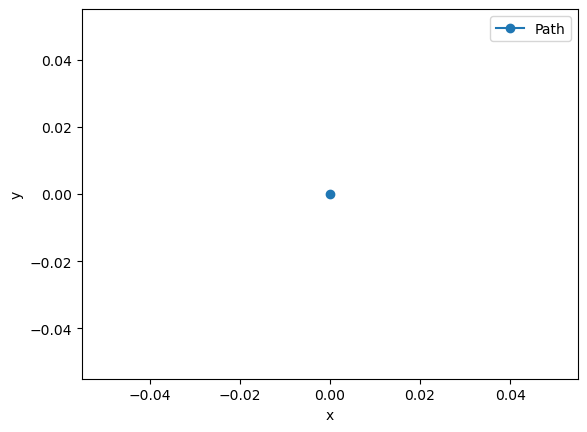

In [180]:
def callback(x):
    path.append(np.copy(x))

# Initial point
x0 = np.array([0.0, 0.0])

# Store the path
path = [np.copy(x0)]

# Run minimize with CG method and callback
result = minimize(Rosenbrock, x0, method='CG', jac=Rosenbrock_grad, callback=callback)
print(result)

# Plot the path
path = np.array(path)
plt.plot(path[:, 0], path[:, 1], '-o', label='Path')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()